In [23]:
import glob
import keras as k  #machine learning library
from keras.models import  Sequential, load_model  #model- Sequential
from keras.layers import Dense   #neural network dense layer(Each neuron recieves input from all the neurons in the previous layer)
import numpy as np  #num py pythton library use for numerical works
import pandas as pd  #pandas library use data manipulation and analysis
from sklearn.model_selection import train_test_split   #machine learining library
from sklearn.preprocessing import LabelEncoder,MinMaxScaler  #for lableEncoder use for converting strig in to number
import matplotlib.pyplot as plt  #use for plot our data
import os
import flask
import pickle

In [24]:
pwd

'C:\\Users\\Kushan\\Documents'

In [25]:
df=pd.read_csv(r'C:\Users\Kushan\Documents\kidney_disease_improve.csv')
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,classification
0,48,80,1.020,1,0,1,0,0,0,121,...,44,7800,5.2,1,1.0,0,1,0,0,1
1,7,50,1.020,4,0,0,0,0,0,175,...,38,6000,3.9,0,0.0,0,1,0,0,1
2,62,80,1.010,2,3,1,0,0,0,423,...,31,7500,3.9,0,1.0,0,0,0,1,1
3,48,70,1.005,4,0,1,1,1,0,117,...,32,6700,3.9,1,0.0,0,0,1,1,1
4,51,80,1.010,2,0,1,0,0,0,106,...,35,7300,4.6,0,0.0,0,1,0,0,1


In [42]:
#get shape of data
df.shape
df.head(380)

,age,bp,al,pcc,bgr,bu,sod,pot,hemo,rbcc,dm,appet,classification
0,40,3,1,0,48,36.0,134.0,4.9,15.4,5.2,1.0,1,1
1,5,0,4,0,84,18.0,134.0,4.9,11.3,3.9,0.0,1,1
2,54,3,2,0,141,53.0,134.0,4.9,9.6,3.9,1.0,0,1
3,40,2,4,1,44,56.0,111.0,2.5,11.2,3.9,0.0,0,1
4,43,3,2,0,33,26.0,134.0,4.9,11.6,4.6,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,50,2,0,0,15,16.0,147.0,3.5,16.4,5.2,0.0,1,0
377,56,2,0,0,24,27.0,145.0,4.8,13.8,4.8,0.0,1,0
378,63,1,0,0,34,33.0,140.0,4.8,15.2,5.5,0.0,1,0
379,54,3,0,0,5,45.0,138.0,3.5,16.1,5.7,0.0,1,0


In [27]:
#create list of columns for informations
columns_to_retain=['al','hemo','pcc','rbcc','age','bp','bu','sod','pot','appet','dm','bgr','classification']  #select columns
df = df.drop([col for col in df.columns if not col in columns_to_retain], axis=1)  # filter selected columns
df = df.dropna(axis=0) # drop missing values or N/A data row

In [28]:
for column in df.columns:
  if df[column].dtype ==np.number:
    continue
  df[column]=LabelEncoder().fit_transform(df[column])

In [32]:
df.tail()

,age,bp,al,pcc,bgr,bu,sod,pot,hemo,rbcc,dm,appet,classification
395,47,3,0,0,64,49.0,150.0,4.9,15.7,4.9,0.0,1,0
396,34,2,0,0,3,31.0,141.0,3.5,16.5,6.2,0.0,1,0
397,8,3,0,0,27,26.0,137.0,4.4,15.8,5.4,0.0,1,0
398,11,1,0,0,41,50.0,135.0,4.9,14.2,5.9,0.0,1,0
399,50,3,0,0,57,18.0,141.0,3.5,15.8,6.1,0.0,1,0


In [31]:
#difining X(feature set) and Y(result set)
X=df.drop(['classification'],axis=1)
Y=df['classification']
X.shape

(399, 12)

In [9]:
#Feature scalling using mon-max, after scalling all features lie between 1 and 0
x_scaler=MinMaxScaler()
x_scaler.fit(X)
column_name=X.columns
X[column_name]=x_scaler.transform(X)

In [10]:
# dvide train set and test sets( shuffle for better train set)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,shuffle=True);

In [11]:
#build model(using sequential method)  1 input layer(13 neurons) / 1 hiddn layer(256 neurons) / 1 out put layer(onr neuron)
model=Sequential()
model.add(Dense(256, activation='relu',kernel_initializer=k.initializers.random_normal(seed=13),input_dim=len(X.columns)))
model.add(Dense(1,activation='hard_sigmoid'))

In [12]:
#compile model
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [13]:
#train data epochs=200
history=model.fit(X_train,Y_train, epochs=500, batch_size=X_train.shape[0])

Epoch 1/500
319/319 [==============================] - 0s 1ms/step - loss: 0.6998 - accuracy: 0.3166
Epoch 2/500
319/319 [==============================] - 0s 6us/step - loss: 0.6888 - accuracy: 0.6395
Epoch 3/500
319/319 [==============================] - 0s 6us/step - loss: 0.6783 - accuracy: 0.6426
Epoch 4/500
319/319 [==============================] - 0s 3us/step - loss: 0.6682 - accuracy: 0.6426
Epoch 5/500
319/319 [==============================] - 0s 6us/step - loss: 0.6585 - accuracy: 0.6426
Epoch 6/500
319/319 [==============================] - 0s 6us/step - loss: 0.6492 - accuracy: 0.6426
Epoch 7/500
319/319 [==============================] - 0s 3us/step - loss: 0.6401 - accuracy: 0.6426
Epoch 8/500
319/319 [==============================] - 0s 6us/step - loss: 0.6314 - accuracy: 0.6426
Epoch 9/500
319/319 [==============================] - 0s 6us/step - loss: 0.6229 - accuracy: 0.6426
Epoch 10/500
319/319 [==============================] - 0s 9us/step - loss: 0.6146 - accura

Epoch 82/500
319/319 [==============================] - 0s 6us/step - loss: 0.1849 - accuracy: 0.9592
Epoch 83/500
319/319 [==============================] - 0s 3us/step - loss: 0.1818 - accuracy: 0.9561
Epoch 84/500
319/319 [==============================] - 0s 3us/step - loss: 0.1787 - accuracy: 0.9561
Epoch 85/500
319/319 [==============================] - 0s 3us/step - loss: 0.1757 - accuracy: 0.9561
Epoch 86/500
319/319 [==============================] - 0s 3us/step - loss: 0.1727 - accuracy: 0.9561
Epoch 87/500
319/319 [==============================] - 0s 3us/step - loss: 0.1698 - accuracy: 0.9561
Epoch 88/500
319/319 [==============================] - 0s 3us/step - loss: 0.1670 - accuracy: 0.9561
Epoch 89/500
319/319 [==============================] - 0s 3us/step - loss: 0.1642 - accuracy: 0.9561
Epoch 90/500
319/319 [==============================] - 0s 6us/step - loss: 0.1616 - accuracy: 0.9561
Epoch 91/500
319/319 [==============================] - 0s 6us/step - loss: 0.1591

Epoch 162/500
319/319 [==============================] - 0s 3us/step - loss: 0.0796 - accuracy: 0.9749
Epoch 163/500
319/319 [==============================] - 0s 3us/step - loss: 0.0792 - accuracy: 0.9749
Epoch 164/500
319/319 [==============================] - 0s 3us/step - loss: 0.0788 - accuracy: 0.9749
Epoch 165/500
319/319 [==============================] - 0s 3us/step - loss: 0.0784 - accuracy: 0.9749
Epoch 166/500
319/319 [==============================] - 0s 6us/step - loss: 0.0780 - accuracy: 0.9749
Epoch 167/500
319/319 [==============================] - 0s 6us/step - loss: 0.0776 - accuracy: 0.9749
Epoch 168/500
319/319 [==============================] - 0s 3us/step - loss: 0.0772 - accuracy: 0.9749
Epoch 169/500
319/319 [==============================] - 0s 6us/step - loss: 0.0769 - accuracy: 0.9749
Epoch 170/500
319/319 [==============================] - 0s 6us/step - loss: 0.0765 - accuracy: 0.9749
Epoch 171/500
319/319 [==============================] - 0s 6us/step - lo

Epoch 242/500
319/319 [==============================] - 0s 6us/step - loss: 0.0586 - accuracy: 0.9812
Epoch 243/500
319/319 [==============================] - 0s 6us/step - loss: 0.0584 - accuracy: 0.9812
Epoch 244/500
319/319 [==============================] - 0s 6us/step - loss: 0.0583 - accuracy: 0.9812
Epoch 245/500
319/319 [==============================] - 0s 3us/step - loss: 0.0581 - accuracy: 0.9812
Epoch 246/500
319/319 [==============================] - 0s 3us/step - loss: 0.0580 - accuracy: 0.9812
Epoch 247/500
319/319 [==============================] - 0s 6us/step - loss: 0.0578 - accuracy: 0.9812
Epoch 248/500
319/319 [==============================] - 0s 6us/step - loss: 0.0577 - accuracy: 0.9812
Epoch 249/500
319/319 [==============================] - 0s 3us/step - loss: 0.0576 - accuracy: 0.9812
Epoch 250/500
319/319 [==============================] - 0s 6us/step - loss: 0.0574 - accuracy: 0.9812
Epoch 251/500
319/319 [==============================] - 0s 6us/step - lo

Epoch 322/500
319/319 [==============================] - 0s 6us/step - loss: 0.0498 - accuracy: 0.9843
Epoch 323/500
319/319 [==============================] - 0s 3us/step - loss: 0.0497 - accuracy: 0.9843
Epoch 324/500
319/319 [==============================] - 0s 3us/step - loss: 0.0497 - accuracy: 0.9843
Epoch 325/500
319/319 [==============================] - 0s 3us/step - loss: 0.0496 - accuracy: 0.9843
Epoch 326/500
319/319 [==============================] - 0s 3us/step - loss: 0.0495 - accuracy: 0.9843
Epoch 327/500
319/319 [==============================] - 0s 3us/step - loss: 0.0494 - accuracy: 0.9843
Epoch 328/500
319/319 [==============================] - 0s 6us/step - loss: 0.0493 - accuracy: 0.9843
Epoch 329/500
319/319 [==============================] - 0s 6us/step - loss: 0.0492 - accuracy: 0.9843
Epoch 330/500
319/319 [==============================] - 0s 6us/step - loss: 0.0491 - accuracy: 0.9843
Epoch 331/500
319/319 [==============================] - 0s 3us/step - lo

Epoch 402/500
319/319 [==============================] - 0s 6us/step - loss: 0.0439 - accuracy: 0.9875
Epoch 403/500
319/319 [==============================] - 0s 3us/step - loss: 0.0439 - accuracy: 0.9875
Epoch 404/500
319/319 [==============================] - 0s 6us/step - loss: 0.0438 - accuracy: 0.9875
Epoch 405/500
319/319 [==============================] - 0s 6us/step - loss: 0.0438 - accuracy: 0.9875
Epoch 406/500
319/319 [==============================] - 0s 6us/step - loss: 0.0437 - accuracy: 0.9875
Epoch 407/500
319/319 [==============================] - 0s 6us/step - loss: 0.0436 - accuracy: 0.9875
Epoch 408/500
319/319 [==============================] - 0s 3us/step - loss: 0.0436 - accuracy: 0.9875
Epoch 409/500
319/319 [==============================] - 0s 6us/step - loss: 0.0435 - accuracy: 0.9875
Epoch 410/500
319/319 [==============================] - 0s 3us/step - loss: 0.0435 - accuracy: 0.9875
Epoch 411/500
319/319 [==============================] - 0s 3us/step - lo

Epoch 482/500
319/319 [==============================] - 0s 6us/step - loss: 0.0401 - accuracy: 0.9906
Epoch 483/500
319/319 [==============================] - 0s 6us/step - loss: 0.0400 - accuracy: 0.9906
Epoch 484/500
319/319 [==============================] - 0s 3us/step - loss: 0.0400 - accuracy: 0.9906
Epoch 485/500
319/319 [==============================] - 0s 6us/step - loss: 0.0399 - accuracy: 0.9906
Epoch 486/500
319/319 [==============================] - 0s 6us/step - loss: 0.0399 - accuracy: 0.9906
Epoch 487/500
319/319 [==============================] - 0s 3us/step - loss: 0.0399 - accuracy: 0.9906
Epoch 488/500
319/319 [==============================] - 0s 3us/step - loss: 0.0398 - accuracy: 0.9906
Epoch 489/500
319/319 [==============================] - 0s 6us/step - loss: 0.0398 - accuracy: 0.9906
Epoch 490/500
319/319 [==============================] - 0s 6us/step - loss: 0.0397 - accuracy: 0.9906
Epoch 491/500
319/319 [==============================] - 0s 3us/step - lo

In [14]:
model.save('ckd.model')

Text(0.5, 0, 'epoch')

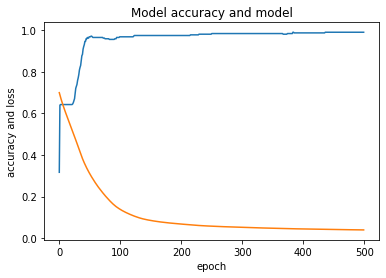

In [15]:
#visualize model and loss accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model accuracy and model')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')

In [16]:
type(X_test)

pandas.core.frame.DataFrame

In [17]:
print('shape of training data: ',X_train.shape)
print('shape of test data: ',X_test.shape)

shape of training data:  (319, 12)
shape of test data:  (80, 12)


In [39]:
pred=model.predict(X_test)
pred=[1 if y>=0.5 else 0 for y in pred]
X_test.head(15)

,age,bp,al,pcc,bgr,bu,sod,pot,hemo,rbcc,dm,appet
1,0.066667,0.0,0.8,0.0,0.575342,0.042362,0.817035,0.053933,0.557823,0.305085,0.0,1.0
100,0.346667,0.2,0.8,0.0,0.486301,0.052632,0.810726,0.029213,0.510204,0.305085,0.0,1.0
153,0.626667,0.5,0.4,0.0,0.842466,0.599487,0.804416,0.020225,0.353741,0.135593,1.0,0.0
324,0.426667,0.3,0.0,0.0,0.315068,0.034660,0.917981,0.053933,0.823129,0.555932,0.0,1.0
379,0.720000,0.3,0.0,0.0,0.034247,0.111682,0.842271,0.022472,0.884354,0.610169,0.0,1.0
281,0.626667,0.3,0.0,0.0,0.383562,0.124519,0.899054,0.056180,0.843537,0.661017,0.0,1.0
122,0.346667,0.2,0.4,0.0,0.575342,0.558408,0.791798,0.029213,0.197279,0.305085,0.0,1.0
310,0.506667,0.1,0.0,0.0,0.198630,0.065469,0.867508,0.053933,0.687075,0.559322,0.0,1.0
259,0.360000,0.3,0.0,0.0,0.212329,0.075738,0.823344,0.056180,0.884354,0.525424,0.0,1.0
291,0.520000,0.3,0.0,0.0,0.349315,0.109114,0.854890,0.053933,0.802721,0.610169,0.0,1.0


In [19]:
print('Original: {0}'.format(','.join(str(x) for x in Y_test)))
print('Predict: {0}'.format(','.join(str(x) for x in pred)))

Original: 1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0,1,0,1,0,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,0,1,1,0,1,0,1,1,1,1,1,1,0,1,1,1,1,0,1,1,0,0,1,1,1
Predict: 1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0,1,0,1,0,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,0,1,1,0,1,0,1,1,1,1,1,1,0,1,1,1,1,0,1,1,0,0,1,1,1


In [22]:
pickle.dump(model, open('model.pkl','wb'))